In [2]:
import matplotlib.pyplot as plt
import numpy as np

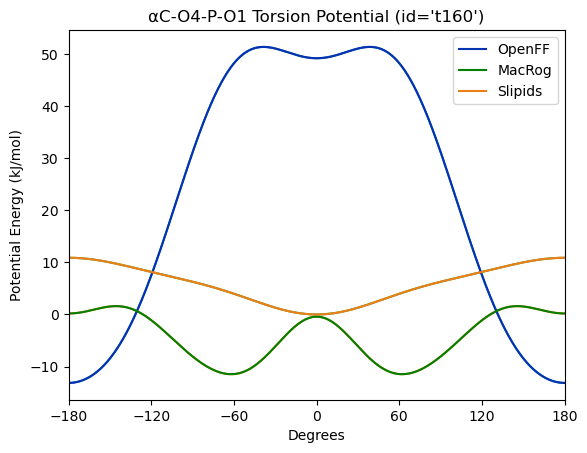

In [19]:
# https://docs.openforcefield.org/projects/toolkit/en/0.7.0/smirnoff.html#propertorsions

# *************************************
# *** OpenFF POPC/POPE calculations ***
# *************************************
# (Type 2)

phi_rad = np.linspace(-np.pi, np.pi, num=1000)
U = -3.176451728097*(1+np.cos(3*phi_rad-0)) + -6.567761030559*(1+np.cos(2*phi_rad-0)) + 34.325785207797*(1+np.cos(1*phi_rad-0))

# ********************************
# *** MacRog POPC calculations ***
# ********************************
# (Type 9)

constants = [-8.06678, 12.1177, 6.92, -5.60552, 1.0315, -6.20684]
D = 0
n = 0

for C in constants:
        D += C*(np.cos(phi_rad-np.pi))**n
        n += 1

# **********************************
# ****** Slipids calculations ******
# **********************************
# (Type 9)

V = 5.0208*(1+np.cos(1*phi_rad-np.pi)) + 0.4184*(1+np.cos(2*phi_rad-np.pi)) + 0.4184*(1+np.cos(3*phi_rad-np.pi))


phi = np.linspace(-180, 180, num=1000)
plt.figure(1)
plt.plot(phi, U)
plt.plot(phi, D)
plt.plot(phi, V)
plt.xlabel("Degrees")
plt.ylabel('Potential Energy (kJ/mol)')
plt.title("⍺C-O4-P-O1 Torsion Potential (id='t160')")
plt.plot(phi,U, color='#0333b0', label='OpenFF')
plt.plot(phi,D, color='green', label='MacRog')
plt.plot(phi,V, color='#ee7f17', label='Slipids')
plt.legend(loc='upper right');
plt.xlim(-180, 180)
plt.xticks([-180,-120,-60,0,60,120,180]);

# U = k*(1+np.cos(n*phi-phi0))

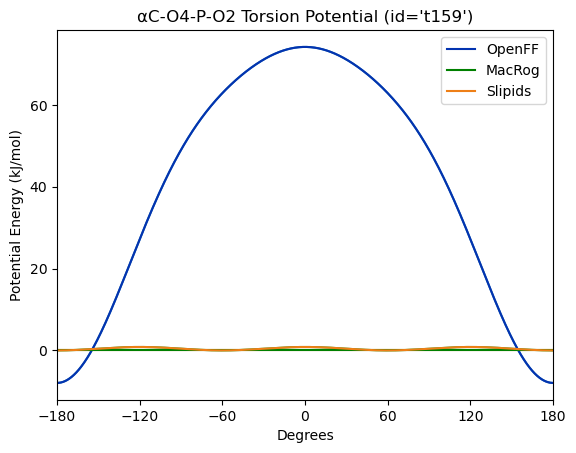

In [20]:
# OpenFF (fits both adj for POPC and POPE)
phi_rad = np.linspace(-np.pi, np.pi, num=1000)
U = 1.791937125636*(1+np.cos(3*phi_rad-0)) + 39.257526139132*(1+np.cos(1*phi_rad-0)) + -7.948558102399*(+np.cos(2*phi_rad-0))

# MacRog
constants = [0, 0, 0, 0, 0, 0]
D = 0
n = 0

for C in constants:
        D += C*(np.cos(phi_rad-np.pi))**n
        n += 1

# Slipids
V = 0.4184*(1+np.cos(3*phi_rad-0))

phi = np.linspace(-180, 180, num=1000)
plt.figure(1)
plt.plot(phi, U)
plt.plot(phi, D)
plt.plot(phi, V)
plt.xlabel("Degrees")
plt.ylabel('Potential Energy (kJ/mol)')
plt.title("⍺C-O4-P-O2 Torsion Potential (id='t159')")
plt.plot(phi,U, color='#0333b0', label='OpenFF')
plt.plot(phi,D, color='green', label='MacRog')
plt.plot(phi,V, color='#ee7f17', label='Slipids')
plt.legend(loc='upper right');
plt.xlim(-180, 180)
plt.xticks([-180,-120,-60,0,60,120,180]);

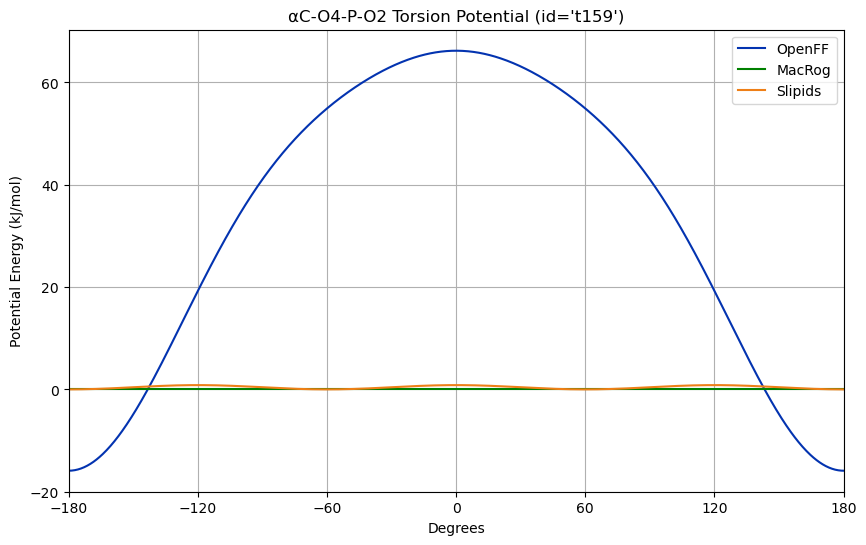

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_dihedral_energy(type, params_list, phi):
    if type == "Slipids" or type == "OpenFF":
        # Type 1 Periodic Calculation (multiple terms)
        # V(phi) = sum( K * (1 + cos(n*phi - delta)) )
        energy = 0.0
        for params in params_list:
            K, n, delta = params
            energy += K * (1 + np.cos(np.deg2rad(n * phi - delta)))
    elif type == "MacRog":
        # Ryckaert-Bellemans Calculation
        # V(phi) = sum(C_i * cos(phi)^i)
        energy = sum(params_list[i] * np.cos(np.deg2rad(phi))**i for i in range(len(params_list)))
    
    return energy

# Usage for Slipids with multiple terms:
# Dihedral parameters for Type 1 torsion (K, n, delta)
slipids_params_list = [
    (0.4184, 3, 0) 
]
phi_values = np.linspace(-180, 180, 1000)  # Generate 1000 points from -180 degrees to 180 degrees
slipids_energies = [calculate_dihedral_energy("Slipids", slipids_params_list, phi) for phi in phi_values]

# Usage for OpenFF with multiple terms:
# Dihedral parameters for Type 1 torsion (K, n, delta)
openff_params_list = [
    (1.791937125636, 3, 0.0),
    (39.257526139132, 1, 0.0),
    (-7.948558102399, 2, 0.0) 
]
openff_energies = [calculate_dihedral_energy("OpenFF", openff_params_list, phi) for phi in phi_values]

macrog_params = [0, 0, 0, 0, 0, 0]
macrog_energies = [calculate_dihedral_energy("MacRog", macrog_params, phi) for phi in phi_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(phi_values, openff_energies, color='#0333b0', label='OpenFF')
plt.plot(phi_values, macrog_energies, color='green', label='MacRog')
plt.plot(phi_values, slipids_energies, color='#ee7f17', label='Slipids')
plt.xlabel("Degrees")
plt.ylabel('Potential Energy (kJ/mol)')
plt.title("⍺C-O4-P-O2 Torsion Potential (id='t159')")
plt.xlim(-180, 180)
plt.xticks([-180,-120,-60,0,60,120,180]);
plt.legend()
plt.grid(True)
plt.show()

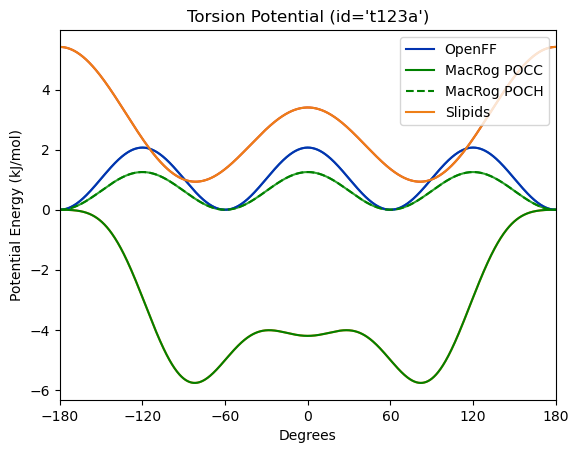

In [22]:
# POCC

# OpenFF
phi_rad = np.linspace(-np.pi, np.pi, num=1000)
U = 1.034867519600*(1+np.cos(3*phi_rad-0))

# MacRog
constants = [-5.62590, 2.08175, 7.69277, 0.01874, -4.16736, 0]
D = 0
n = 0

for C in constants:
        D += C*(np.cos(phi_rad-np.pi))**n
        n += 1

constants2 = [0.62760, 1.88280, 0.00000, -2.51040, 0.00000, 0.0000]
D2 = 0
n2 = 0
# P   OSp CT  HC   3   0.62760   1.88280   0.00000  -2.51040   0.00000   0.0000
for C2 in constants2:
        D2 += C2*(np.cos(phi_rad-np.pi))**n2
        n2 += 1

# Slipids
V = 1.702888*(1+np.cos(2*phi_rad-0)) + 1.008344*(1+np.cos(1*phi_rad-np.pi))

phi = np.linspace(-180, 180, num=1000)
plt.figure(1)
plt.plot(phi, U)
plt.plot(phi, D)
plt.plot(phi, D2)
plt.plot(phi, V)
plt.xlabel("Degrees")
plt.ylabel('Potential Energy (kJ/mol)')
plt.title("Torsion Potential (id='t123a')")
plt.plot(phi,U, color='#0333b0', label='OpenFF')
plt.plot(phi,D, color='green', label='MacRog POCC')
plt.plot(phi,D2, color='green', linestyle='dashed', label='MacRog POCH')
plt.plot(phi,V, color='#ee7f17', label='Slipids')
plt.legend(loc='upper right');
plt.xlim(-180, 180)
plt.xticks([-180,-120,-60,0,60,120,180]);
